In [4]:
# Import Necessary Libraries
# Read In and Explore the Data
# Data Analysis
# Data Visualization
# Cleaning Data
# Choosing the Best Model
# Creating Submission File

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline



In [5]:
df = pd.read_csv(r"C:\Users\felix\Documents\Python Stuff\Hands on Labs\Machine Learning\Additional learning\train.csv")
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


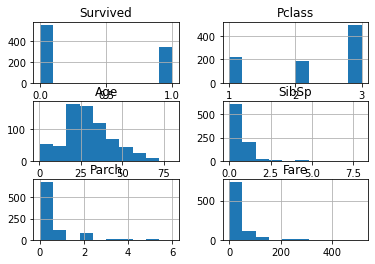

In [6]:
cdf = df[["Survived","Pclass","Age","SibSp","Parch","Fare"]]
vis = cdf[["Survived","Pclass","Age","SibSp","Parch","Fare"]]
vis.hist()
plt.show()

In [36]:
#PLots


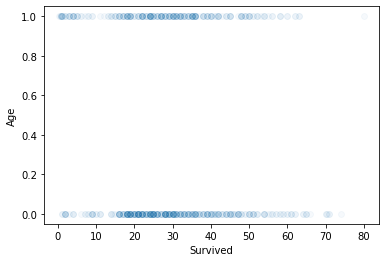

In [7]:
#Age
plt.scatter(cdf.Age,cdf.Survived, alpha=0.04)
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

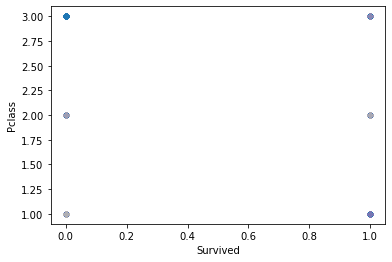

In [8]:
#PClass
plt.scatter(cdf.Survived,cdf.Pclass, alpha=0.003)
plt.xlabel("Survived")
plt.ylabel("Pclass")
plt.show()

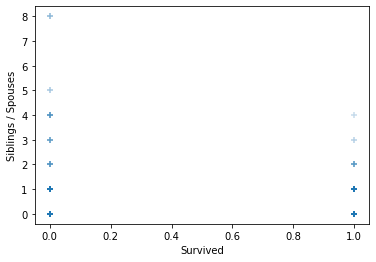

In [9]:
plt.scatter(cdf.Survived,cdf.SibSp, alpha=0.09, marker="+")
plt.xlabel("Survived")
plt.ylabel("Siblings / Spouses")
plt.show()

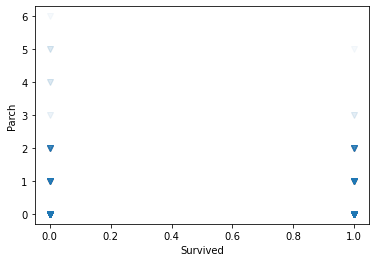

In [10]:
plt.scatter(cdf.Survived, cdf.Parch,alpha=0.04, marker="v")
plt.xlabel("Survived")
plt.ylabel("Parch")
plt.show()

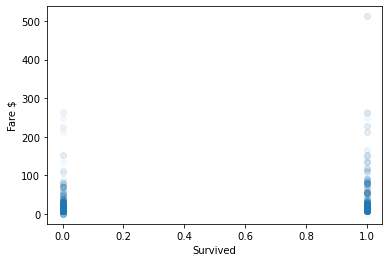

In [15]:
plt.scatter(cdf.Survived, cdf.Fare, alpha=0.04)
plt.xlabel("Survived")
plt.ylabel("Fare $")
plt.show()

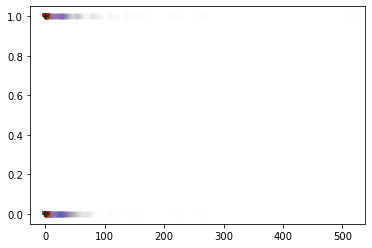

In [23]:
#All BUT MAKES NO SENSE REALLY TO DO THIS

plt.scatter(cdf.Age,cdf.Survived, alpha=0.003)
plt.scatter(cdf.Pclass,cdf.Survived, alpha=0.003)
plt.scatter(cdf.SibSp,cdf.Survived, alpha=0.003, marker="+")
plt.scatter(cdf.Parch, cdf.Survived,alpha=0.003, marker="v")
plt.scatter(cdf.Fare, cdf.Survived, alpha=0.003)


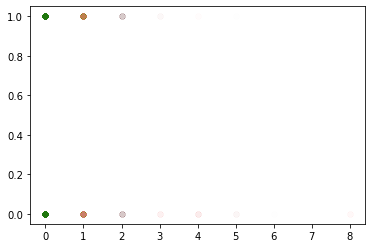

In [28]:
#More chances if you have less family members

plt.scatter(cdf.Parch, cdf.Survived,alpha=0.003)
plt.scatter(cdf.SibSp,cdf.Survived, alpha=0.003)
plt.show()

In [29]:
#MODELING

In [44]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(cdf[["Survived"]])
train_y = np.asanyarray(cdf[["Pclass"]])

#training the model

regr.fit(train_x, train_y)

print("Coefficient: ", regr.coef_)
print("Intercept: ", regr.intercept_)

Coefficient:  [[-0.58158374]]
Intercept:  [2.53187614]


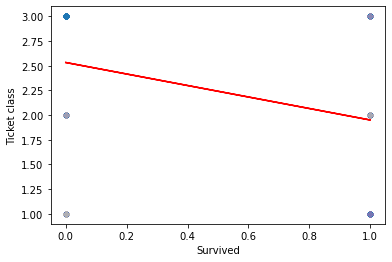

In [61]:
plt.scatter(cdf.Survived, cdf.Pclass, alpha=0.004)
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], "-r")
plt.xlabel("Survived")
plt.ylabel("Ticket class")
plt.show()

In [62]:
#Test

In [70]:
from sklearn.metrics import r2_score

test = pd.read_csv(r"C:\Users\felix\Documents\Python Stuff\Hands on Labs\Machine Learning\Additional learning\test.csv")

test_x = np.asanyarray(test[["Survived"]])


KeyError: "None of [Index(['Survived'], dtype='object')] are in the [columns]"

In [71]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
